In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [4]:
k = 20
lamb = 0.1
thresh = .0001

In [7]:
def setup_qp(link,k):
    q = dict()
    p = dict()
    with open(link) as  f:
        for l in f:
            info = [int(i) for i in l.split('\t')]#read info
            q[info[0]] = np.random.uniform(0,np.sqrt(5/k),(k,1))
            p[info[1]] = np.random.uniform(0,np.sqrt(5/k),(k,1))
    return q,p
    
def error(link,p,q, lamb):
    f = open(link)
    err =0
    with open(link) as f:
        for l in f:
            info = [int(i) for i in l.split('\t')]#read info
            #print((info[2]-q[info[0]].T@p[info[1]])**2)
            err += (info[2]-q[info[0]].T@p[info[1]])**2
    err += lamb*sum([np.linalg.norm(p_u)**2 for p_u in p.values()])
    err += lamb*sum([np.linalg.norm(q_i)**2 for q_i in q.values()])
    return err

def calc_eps(rating,q,q_ind,p,p_ind):
    eps = 2*(rating - q[q_ind].T@p[p_ind])
    return eps

def q_update(eps,lam,l_rate,q,q_ind,p,p_ind,new_q):
    new_q[q_ind] = q[q_ind] + l_rate*(p[p_ind]*eps - 2*lam*q[q_ind])

def p_update(eps,lam,l_rate, q,q_ind,p,p_ind, new_p):
    new_p[p_ind] = p[p_ind] + l_rate*(q[q_ind]*eps - 2*lam*p[p_ind])

def update(lamb,l_rate,info,q,new_q,p,new_p):
    eps = calc_eps(info[-1],q,info[0],p,info[1])
    q_update(eps,lamb,l_rate,q,info[0],p,info[1],new_q)
    p_update(eps,lamb,l_rate,q,info[0],p,info[1],new_p)


In [10]:
q, p = setup_qp('./data/ratings.train.txt',k)

In [11]:
new_q = q.copy()
new_p = p.copy()
#l_rates = [.01,.001,.05,.2,.0001]
l_rate = .025
# l_errors=[]
# for l_rate in l_rates:
q,p =setup_qp('./data/ratings.train.txt',k)
errors=[]
idx = 0
while True:
    new_q = q.copy()
    new_p = p.copy()
    with open('./data/ratings.train.txt') as f:
        for l in f:# do the updates
            info = [int(i) for i in l.split('\t')]#read info
            update(lamb,l_rate,info,q,new_q,p,new_p)
            q = new_q.copy()
            p = new_p.copy()
    err = error('./data/ratings.train.txt',p,q,lamb)
    errors+=[err]
    print('Iter %d, Error %.2f' %(idx,err))
    if (idx == 39):
        break
    idx+=1

Iter 0, Error 92157.99
Iter 1, Error 89740.00
Iter 2, Error 85873.84
Iter 3, Error 82002.13
Iter 4, Error 78379.78
Iter 5, Error 75031.02
Iter 6, Error 72141.47
Iter 7, Error 69760.31
Iter 8, Error 67838.41
Iter 9, Error 66293.11
Iter 10, Error 65044.30
Iter 11, Error 64026.84
Iter 12, Error 63190.83
Iter 13, Error 62498.38
Iter 14, Error 61920.39
Iter 15, Error 61434.29
Iter 16, Error 61022.35
Iter 17, Error 60670.60
Iter 18, Error 60367.99
Iter 19, Error 60105.73
Iter 20, Error 59876.87
Iter 21, Error 59675.83
Iter 22, Error 59498.13
Iter 23, Error 59340.17
Iter 24, Error 59199.00
Iter 25, Error 59072.22
Iter 26, Error 58957.83
Iter 27, Error 58854.19
Iter 28, Error 58759.91
Iter 29, Error 58673.81
Iter 30, Error 58594.92
Iter 31, Error 58522.38
Iter 32, Error 58455.47
Iter 33, Error 58393.57
Iter 34, Error 58336.13
Iter 35, Error 58282.69
Iter 36, Error 58232.83
Iter 37, Error 58186.20
Iter 38, Error 58142.48
Iter 39, Error 58101.39


Text(0.5, 1.0, 'Lambda=.1,k=20, Learning Rate .025')

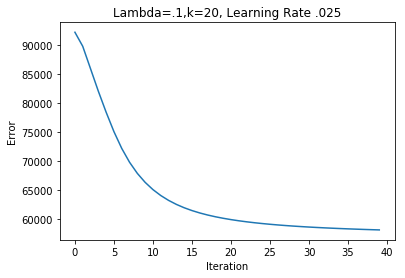

In [12]:
plt.plot(np.squeeze(errors))
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Lambda=.1,k=20, Learning Rate .025')